In [53]:
%matplotlib inline

# Align TEMCA optical templates

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import boto3
import cv2
import skimage.io as io
import skimage
from skimage import data
from skimage import feature
from skimage import color
from skimage import filters
from skimage import transform 
from skimage import draw
from skimage import measure
from skimage import morphology
import skdemo
from scipy import ndimage as ndi
from toolbox.TAO.tao import TAO
from toolbox.TAO.taoDB import TAOdb
import time

(<matplotlib.axes._subplots.AxesSubplot at 0x18c6e3080>,
 <matplotlib.axes._subplots.AxesSubplot at 0x190e30198>)

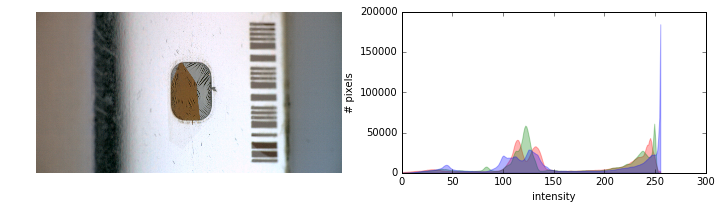

In [55]:
# get an image
tao =  TAO()
taoDB = TAOdb()
url = taoDB.get_aperture_image_url('donaldtrump', 'test1', '000040')
im = io.imread(url)
skdemo.imshow_with_histogram(im);

## Retrieve the template for this specimen

(<matplotlib.axes._subplots.AxesSubplot at 0x190f31dd8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x19161aa90>)

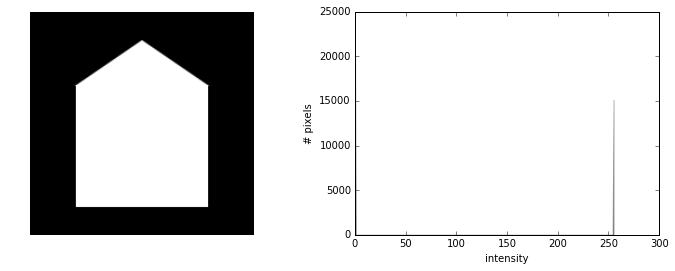

In [56]:
# get the master template for the specimen
url = taoDB.get_specimen_template_url('testspecimen')
template_im = io.imread(url)
skdemo.imshow_with_histogram(template_im)

## Get the boundaries of the template

('Number of coordinates:', 457, 6)
[[ 175.  158.]
 [ 174.   40.]
 [  66.   39.]
 [  25.   98.]
 [  66.  160.]
 [ 175.  158.]]


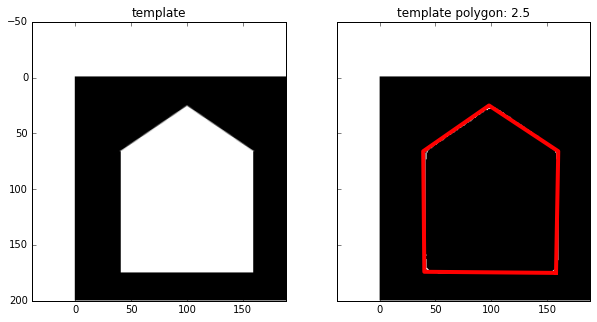

In [71]:
w, h = template_im.shape
image = template_im

edges = feature.canny(image, sigma=4.0)

# Much better solution: find contours and then subsample the polygon
contours = measure.find_contours(image, 0.5)
tolerance1 = 2.5

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5), sharex=True,
                                    sharey=True)
ax0.imshow(image, 'gray')
ax0.set_title('template')

ax1.imshow(edges, 'gray')
ax1.set_title('template polygon: ' + str(tolerance1))

for contour in measure.find_contours(image, 0):
    coords = measure.approximate_polygon(contour, tolerance=tolerance1)
    ax1.plot(coords[:, 1], coords[:, 0], '-r', linewidth=4)
    print("Number of coordinates:", len(contour), len(coords))
    #print coords
    
    
    

exit capture


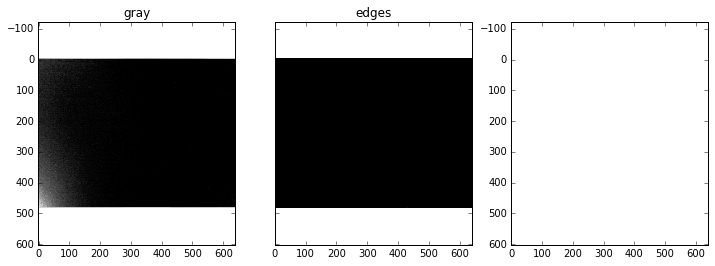

In [77]:
cap = cv2.VideoCapture(0)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 4), sharex=True,
                                sharey=True)

ax0.set_title('gray')
ax1.set_title('edges')
ax2.set_title('line segments: ' + str(tolerance2))

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    ax0.imshow(gray, 'gray')

    edges = feature.canny(gray, sigma=4.0)
    ax1.imshow(edges, 'gray')    
    
    ax2.clear()
    for contour in measure.find_contours(edges, 0):
        coords = measure.approximate_polygon(contour, tolerance=tolerance1)
        ax2.plot(coords[:, 1], coords[:, 0], '-r', linewidth=4)
    
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.01)

    # 
    if (np.mean(gray) <20):
        break
    
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
print ('exit capture')

In [59]:
cap.release()
cv2.destroyAllWindows()